In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_csv('/content/Position_Salaries (1).csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


#**Data Preparation:**

###It is a good idea to check for the null values in the dataset in the beginning. Because if we have null values machine learning model will not work. The following line of code will return the number of null values in each column of the DataFrame:

In [5]:
df.isnull().sum()

,0
Position,0
Level,0
Salary,0


####The dataset has three columns with string values. Because machine learning models can take only numeric values, we need to replace those categorical string values with numeric values:

In [6]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


#Defining Input Features and Target Variable

<ipython-input-7-a0cca3d38d5b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


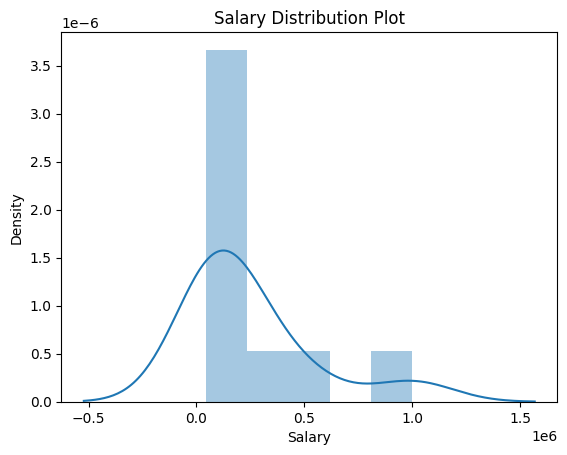

In [7]:
# Data Distribution

plt.title('Salary Distribution Plot')
sns.distplot(df['Salary'])
plt.show()

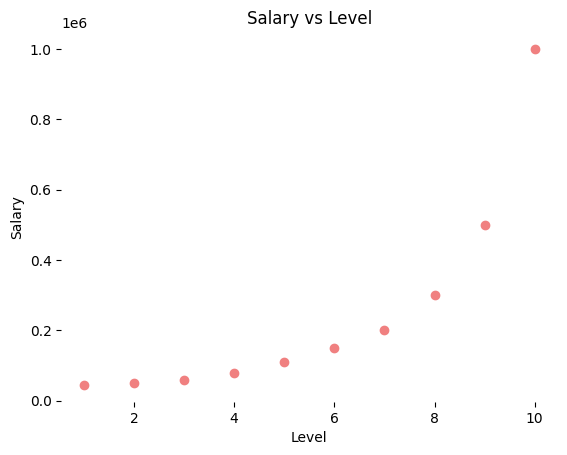

In [8]:
# Relationship between Salary and Level
plt.scatter(df['Level'], df['Salary'], color = 'lightcoral')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.box(False)
plt.show()

####Split the Data for Training and Testing

In [9]:
x = df.iloc[:,1:2].values
y = df.iloc[:,2].values

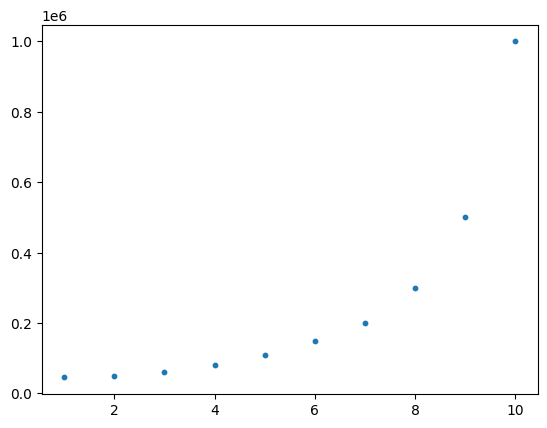

In [10]:
plt.scatter(x,y,s=10)
plt.show()

##Model Development

####As Polynomial Regression is based on Linear Regression we need to import Linear Regression and Polynomial Features method. Model development has a bit extra step than Linear Regression.

#### 1. The first step is to call the PolynomialFeatures method with the degree of power.

#### 2. Fitting the input features to the PolynomialFeatures method for both training and testing data.

#### 3. Fitting the training input and output variables into the Polynomial Features method.

#### 4. Finally, when the data is ready, use the Linear Regression method to train the model.

In [11]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)

poly.fit(x_poly,y)
lin_poly = LinearRegression()
lin_poly.fit(x_poly, y)

LinearRegression()

In [13]:
rmse = np.sqrt(mean_squared_error(y,lin_poly.predict(poly.fit_transform(x))))
r2 = r2_score(y,lin_poly.predict(poly.fit_transform(x)))
print(rmse)
print(r2)

82212.12400451249
0.9162082221443942
